# Práctica 1

In [1]:
# Librerías
# Nota: puedes importar cualquier otra librería que necesites usar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install tftb

In [3]:
!pip install pyEDFlib

In [4]:
!pip install pywavelets

In [5]:
!pip install plotly

In [6]:
!pip install wfdb

In [7]:
!pip install cvxpy

In [8]:
!pip install statsmodels

In [9]:
!pip install spectrum

In [10]:
# Leer dataset

data = pd.read_csv('datasets/south_africa_chd.csv')

In [11]:
# Visualizar los primeros elementos del dataset

data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [12]:
# Forma del dataset

data.shape

(462, 10)

In [13]:
# Visualizar un cojunto de elementos del dataset cualquiera

data.iloc[100:106,:]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
100,136,8.00,7.85,23.81,Present,51,22.69,2.78,50,No
101,166,0.07,4.03,29.29,Absent,53,28.37,0.00,27,No
102,118,0.00,4.34,30.12,Present,52,32.18,3.91,46,No
103,128,0.42,4.60,26.68,Absent,41,30.97,10.33,31,No
104,118,1.50,5.38,25.84,Absent,64,28.63,3.89,29,No
105,158,3.60,2.97,30.11,Absent,63,26.64,108.00,64,No


In [14]:
# Selección de variables numéricas y categóricas

list_var_num = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']
list_var_cat = ['famhist','chd']

var_num = data[list_var_num]
var_cat = data[list_var_cat]

In [15]:
var_num.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49


In [16]:
var_cat.head()

,famhist,chd
0,Present,Si
1,Absent,Si
2,Present,No
3,Present,Si
4,Present,Si


### 1) Análisis univariante no gráfico

#### Categóricas

In [17]:
# Tabla de conteo, proporción y procentaje

## variable famhist

count = var_cat['famhist'].value_counts()
proportion = count/var_cat['famhist'].count()
percent = proportion*100

table = pd.DataFrame({'count':count, 
                      'proportion':proportion,
                      'percent':percent}).transpose()

table['Total'] = table.sum(axis=1)

table

famhist,Absent,Present,Total
count,270.000000,192.000000,462.0
proportion,0.584416,0.415584,1.0
percent,58.441558,41.558442,100.0


In [18]:
# Realiza la tabla de conteo, proporción y procentaje para la variable categórica chd
count = var_cat['chd'].value_counts()
proportion = count/var_cat['chd'].count()
percent = proportion*100

table = pd.DataFrame({'count':count, 
                      'proportion':proportion,
                      'percent':percent}).transpose()

table['Total'] = table.sum(axis=1)

table

chd,No,Si,Total
count,302.000000,160.000000,462.0
proportion,0.653680,0.346320,1.0
percent,65.367965,34.632035,100.0


#### Numéricas

In [19]:
# Calcula, para una variable numérica que elijas, la tendencia central (media, mediana y moda) 
# y la dispersión (varianza y desviación estándar)

# Seleccionamos la variable 'age' como ejemplo
variable = var_num['age']

# Tendencia central
media = variable.mean() # media
mediana = variable.median() # mediana
moda = variable.mode()[0]  # mode() devuelve una Serie, tomamos el primer valor => moda

# Dispersión
varianza = variable.var() # varianza
desviacion_estandar = variable.std()    # desviación típica

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion_estandar}")

Media: 42.816017316017316
Mediana: 45.0
Moda: 16
Varianza: 213.42160839883172
Desviación estándar: 14.60895644455249


### 2) Análisis univariante gráfico

#### Categóricas

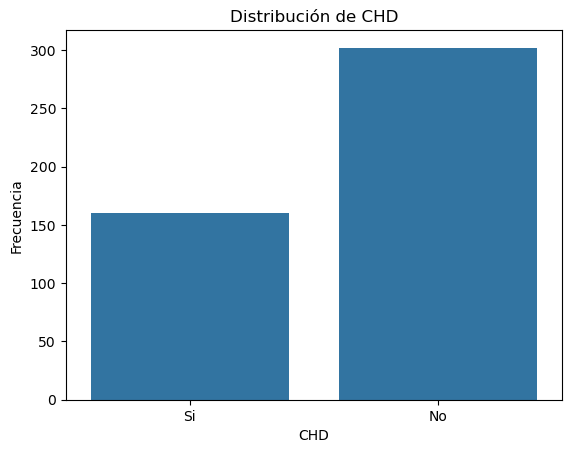

In [20]:
# Crea un **bar chart** para una variable categórica que elijas

# Seleccionamos la variable 'chd' como ejemplo
sns.countplot(x='chd', data=var_cat)
plt.title('Distribución de CHD')
plt.xlabel('CHD')
plt.ylabel('Frecuencia')
plt.show()

#### Numéricas

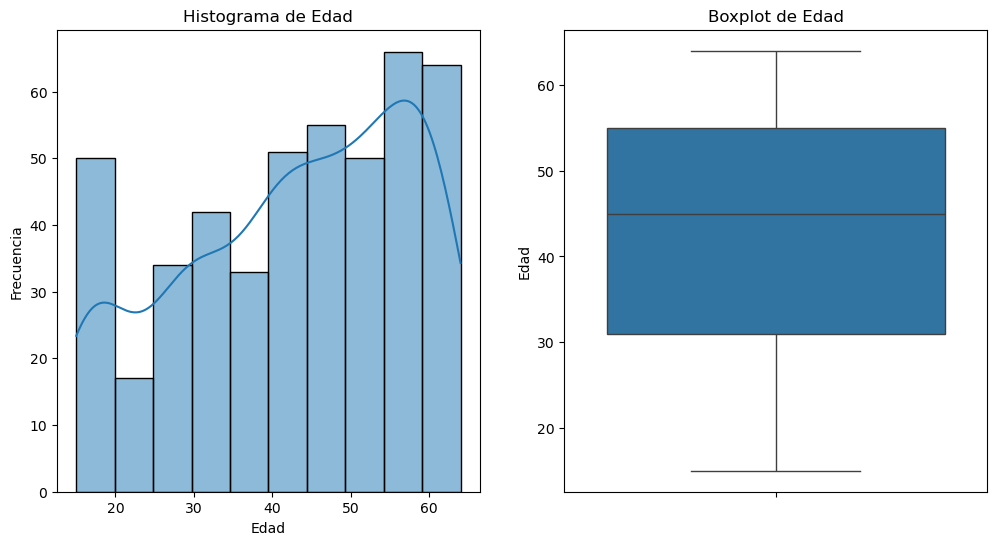

In [21]:
# Crea un histograma y un boxplot para una variable numérica que elijas

# Seleccionamos la variable 'age' como ejemplo
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(var_num['age'], kde=True)
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=var_num['age'])
plt.title('Boxplot de Edad')
plt.ylabel('Edad')

plt.show()

### 3) Análisis multivariante no gráfico

#### Categóricas

In [22]:
# Calcula una tabla cruzada para las variables categóricas del dataset

tabla_cruzada = pd.crosstab(var_cat['famhist'], var_cat['chd'])
print(tabla_cruzada)

chd       No  Si
famhist         
Absent   206  64
Present   96  96


#### Numéricas

In [23]:
# Calcula la tabla de covarianzas y correlaciones para las variables numéricas del dataset

# Covarianza
covarianza = var_num.cov()
print("Matriz de Covarianza:")
print(covarianza)

# Correlación
correlacion = var_num.corr()
print("\nMatriz de Correlación:")
print(correlacion)

Matriz de Covarianza:
                  sbp    tobacco       ldl  adiposity      typea    obesity  \
sbp        420.099018  19.980904  6.719048  56.853088 -11.561146  20.560605   
tobacco     19.980904  21.095870  1.511467  10.243648  -0.658701   2.410084   
ldl          6.719048   1.511467  4.288665   7.096730   0.895541   2.884043   
adiposity   56.853088  10.243648  7.096730  60.539271  -3.295625  23.492566   
typea      -11.561146  -0.658701  0.895541  -3.295625  96.383976   3.061481   
obesity     20.560605   2.410084  2.884043  23.492566   3.061481  17.755101   
alcohol     70.295979  22.579878 -1.693487  19.110856   9.493078   5.324835   
age        116.409504  30.216833  9.433118  71.150916 -14.716201  17.961062   

              alcohol         age  
sbp         70.295979  116.409504  
tobacco     22.579878   30.216833  
ldl         -1.693487    9.433118  
adiposity   19.110856   71.150916  
typea        9.493078  -14.716201  
obesity      5.324835   17.961062  
alcohol    599

### 4) Análisis multivariante gráfico

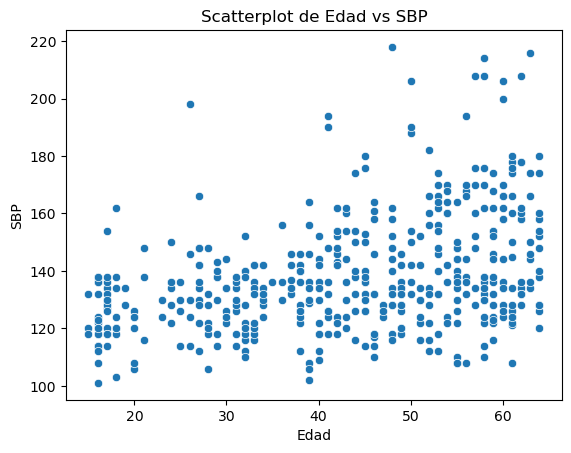

In [24]:
# Crea un scatterplot de dos variables numéricas del dataset

# Seleccionamos 'age' y 'sbp' como ejemplo
sns.scatterplot(x='age', y='sbp', data=var_num)
plt.title('Scatterplot de Edad vs SBP')
plt.xlabel('Edad')
plt.ylabel('SBP')
plt.show()

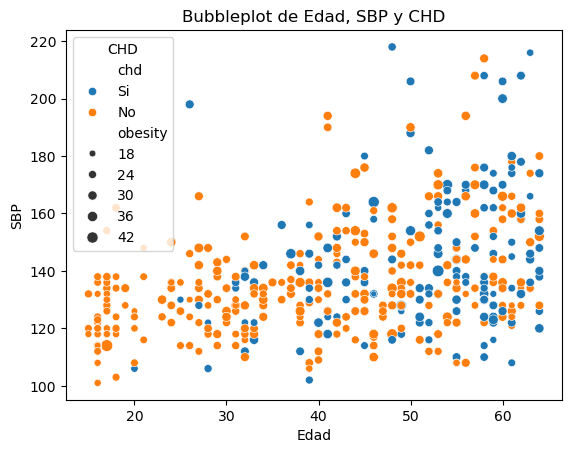

In [25]:
# EXTRA: Crea un bubbleplot de dos o tres variables numéricas y una categórica del dataset

# Seleccionamos 'age', 'sbp' y 'chd' como ejemplo
sns.scatterplot(x='age', y='sbp', size='obesity', hue='chd', data=data)
plt.title('Bubbleplot de Edad, SBP y CHD')
plt.xlabel('Edad')
plt.ylabel('SBP')
plt.legend(title='CHD')
plt.show()